In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler

In [282]:
df = pd.read_excel(r'D:\Downloads\rk_month.xlsx')

In [283]:
df=df.set_index('From Date')

## Changes Made:
1. Changed Strict Lockdown from 25th March to 24th March
2. Added Lockdown With Additional relaxations,After Lockdown

#Before Lockdown 30th Jan-22nd March

In [284]:
tar_data=df.loc["2020-01-30":"2020-03-22"]

In [285]:
frames=[df.loc["2013-01-30":"2013-03-22"],df.loc["2014-01-30":"2014-03-22"],df.loc["2015-01-30":"2015-03-22"],df.loc["2016-01-30":"2016-03-22"],df.loc["2017-01-30":"2017-03-22"],df.loc["2018-01-30":"2018-03-22"],df.loc["2019-01-30":"2019-03-22"]]
noLock_data=pd.concat(frames)
noLock_data

,PM2.5,PM1,NO,NO2,NOx,NH3,SO2,CO,Ozone,RH,WS,WD,SR,BP,AT
From Date,,,,,,,,,,,,,,,
2013-02-03,278.541429,410.105714,208.472857,94.730000,376.922857,86.567143,15.220000,2.988571,31.498571,67.337143,0.875714,188.288571,220.962857,744.534286,16.388571
2013-02-10,124.094286,351.747143,33.297143,61.512857,98.741429,38.755714,14.894286,1.398571,36.125714,69.635714,1.741429,173.318571,199.121429,742.711429,16.395714
2013-02-17,159.452857,310.677143,138.960000,112.031429,295.152857,47.402857,15.937143,1.712857,43.004286,66.170000,1.158571,210.821429,191.380000,742.681429,16.527143
2013-02-24,137.767143,264.212857,45.031429,81.982857,134.888571,32.922857,13.138571,1.077143,33.842857,71.375714,1.594286,189.841429,220.324286,743.030000,18.162857
2013-03-03,119.725714,295.615714,62.835714,45.622857,124.991429,42.147143,12.805714,1.257143,58.048571,59.300000,1.878571,206.311429,225.847143,743.210000,19.968571
2013-03-10,127.931429,199.852857,85.127143,64.401429,174.762857,46.935714,86.000000,1.795714,60.211429,58.002857,1.361429,229.501429,183.240000,738.635714,21.448571
2013-03-17,86.667857,184.107143,211.797143,80.755714,361.221429,30.364286,123.105000,2.961429,56.810000,50.509286,1.237143,215.994286,135.981429,733.627143,21.280000
2014-02-02,178.515714,411.392857,156.544286,99.442857,302.387143,63.175714,35.102857,3.281429,49.747143,62.458571,0.980000,206.178571,72.111429,733.860000,13.571429
2014-02-09,141.782857,345.984286,119.704286,89.892857,243.568571,44.751429,40.104286,2.322857,59.120000,59.770000,1.205714,207.591429,82.224286,733.698571,12.558571


In [286]:
Lock_data=df.loc["2019-01-30":"2019-03-22"]

##PM2.5

In [287]:
tar_PM25=tar_data["PM2.5"].median()
tar_PM25

77.15357142857144

In [288]:
noLock_PM25=noLock_data["PM2.5"].median()
noLock_PM25

109.9757142857143

In [289]:
lock_PM25=Lock_data["PM2.5"].median()
lock_PM25

110.2885714285714

In [290]:
pred_PM25=97.57516

In [291]:
lock_PM25=((-lock_PM25+tar_PM25)/lock_PM25)*100
noLock_PM25=((-noLock_PM25+tar_PM25)/noLock_PM25)*100
pred_PM25=((-pred_PM25+tar_PM25)/pred_PM25)*100
pred_PM25

-20.929085405987095

In [292]:
lock_PM25

-30.043910779513457

In [293]:
tar_PM25

77.15357142857144

##PM10

In [294]:
pred_PM10=232.80501

In [295]:
tar_PM10=tar_data["PM1"].median()
tar_PM10

181.63428571428568

In [296]:
noLock_PM10=noLock_data["PM1"].median()
noLock_PM10

269.3314285714285

In [297]:
lock_PM10=Lock_data["PM1"].median()
lock_PM10

192.1557142857143

In [298]:
lock_PM10=((-lock_PM10+tar_PM10)/lock_PM10)*100
noLock_PM10=((-noLock_PM10+tar_PM10)/noLock_PM10)*100
pred_PM10=((-pred_PM10+tar_PM10)/pred_PM10)*100
pred_PM10

-21.980078644232925

##NO

In [299]:
pred_NO=60.95057

In [300]:
tar_NO=tar_data["NO"].median()
tar_NO

39.986428571428576

In [301]:
noLock_NO=noLock_data["NO"].median()
noLock_NO

84.91857142857143

In [302]:
lock_NO=Lock_data["NO"].median()
lock_NO

65.5957142857143

In [303]:
lock_NO=((-lock_NO+tar_NO)/lock_NO)*100
noLock_NO=((-noLock_NO+tar_NO)/noLock_NO)*100
pred_NO=((-pred_NO+tar_NO)/pred_NO)*100
pred_NO

-34.39531644834728

##NO2

In [304]:
pred_NO2=57.16257

In [305]:
tar_NO2=tar_data["NO2"].median()
tar_NO2

47.037857142857135

In [306]:
noLock_NO2=noLock_data["NO2"].median()
noLock_NO2

77.46142857142857

In [307]:
lock_NO2=Lock_data["NO2"].median()
lock_NO2

73.70857142857143

In [308]:
lock_NO2=((-lock_NO2+tar_NO2)/lock_NO2)*100
noLock_NO2=((-noLock_NO2+tar_NO2)/noLock_NO2)*100
pred_NO2=((-pred_NO2+tar_NO2)/pred_NO2)*100
pred_NO2

-17.71213725545032

##NH3

In [309]:
pred_NH3=25.72517

In [310]:
tar_NH3=tar_data["NH3"].median()
tar_NH3

15.444285714285709

In [311]:
noLock_NH3=noLock_data["NH3"].median()
noLock_NH3

38.01428571428572

In [312]:
lock_NH3=Lock_data["NH3"].median()
lock_NH3

25.91714285714286

In [313]:
lock_NH3=((-lock_NH3+tar_NH3)/lock_NH3)*100
noLock_NH3=((-noLock_NH3+tar_NH3)/noLock_NH3)*100
pred_NH3=((-pred_NH3+tar_NH3)/pred_NH3)*100
pred_NH3

-39.964300666290214

##NOx

In [314]:
pred_NOx=88.79307

In [315]:
tar_NOx=tar_data["NOx"].median()
tar_NOx

60.64785714285715

In [316]:
noLock_NOx=noLock_data["NOx"].median()
noLock_NOx

145.9114285714286

In [317]:
lock_NOx=Lock_data["NOx"].median()
lock_NOx

91.15285714285713

In [318]:
lock_NOx=((-lock_NOx+tar_NOx)/lock_NOx)*100
noLock_NOx=((-noLock_NOx+tar_NOx)/noLock_NOx)*100
pred_NOx=((-pred_NOx+tar_NOx)/pred_NOx)*100
pred_NOx

-31.69753321643553

##SO2

##CO

##Ozone

In [319]:
pred_ozone=31.49071

In [320]:
tar_ozone=tar_data["Ozone"].median()
tar_ozone

20.69642857142857

In [321]:
noLock_ozone=noLock_data["Ozone"].median()
noLock_ozone

52.62

In [322]:
lock_ozone=Lock_data["Ozone"].median()
lock_ozone

14.06285714285714

In [323]:
lock_ozone

14.06285714285714

In [324]:
lock_ozone=((-lock_ozone+tar_ozone)/lock_ozone)*100
noLock_ozone=((-noLock_ozone+tar_ozone)/noLock_ozone)*100
pred_ozone=((-pred_ozone+tar_ozone)/pred_ozone)*100
pred_ozone

-34.277669282691406

##Final Plot

Text(0, 0.5, 'Concentration drop %')

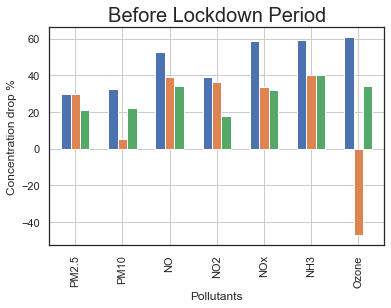

In [325]:
plot_df=pd.DataFrame([["PM2.5",-noLock_PM25,-lock_PM25,-pred_PM25],
                      ["PM10",-noLock_PM10,-lock_PM10,-pred_PM10],
                      ["NO",-noLock_NO,-lock_NO,-pred_NO],
                      ["NO2",-noLock_NO2,-lock_NO2,-pred_NO2],
                      ["NOx",-noLock_NOx,-lock_NOx,-pred_NOx],
                      ["NH3",-noLock_NH3,-lock_NH3,-pred_NH3],
                      ["Ozone",-noLock_ozone,-lock_ozone,-pred_ozone]],columns=["Pollutants","LongTerm 2013-2019","ShortTerm 2019","Predicted 2020"])
sns.set_style(style='white')
plot_df.plot(x="Pollutants",kind="bar",stacked=False,width=0.6,legend=None)
#plt.legend(loc="upper center", bbox_to_anchor=(1.3, 1.15), ncol=1)
plt.title("Before Lockdown Period",fontsize=20)
plt.grid()
plt.ylabel("Concentration drop %")

In [326]:
plot_df

,Pollutants,LongTerm 2013-2019,ShortTerm 2019,Predicted 2020
0,PM2.5,29.844901,30.043911,20.929085
1,PM10,32.561051,5.475470,21.980079
2,NO,52.912033,39.041096,34.395316
3,NO2,39.275769,36.184007,17.712137
4,NOx,58.435156,33.465764,31.697533
5,NH3,59.372416,40.408996,39.964301
6,Ozone,60.668133,-47.170866,34.277669


#Strict Lockdown 24th March-14th April



In [327]:
tar_data=df.loc["2020-03-24":"2020-04-14"]

In [328]:
frames=[df.loc["2013-03-24":"2013-04-14"],df.loc["2014-03-24":"2014-04-14"],df.loc["2015-03-24":"2015-04-14"],df.loc["2016-03-24":"2016-04-14"],df.loc["2017-03-24":"2017-04-14"],df.loc["2018-03-24":"2018-04-14"],df.loc["2019-03-24":"2019-04-14"]]
noLock_data=pd.concat(frames)
noLock_data

,PM2.5,PM1,NO,NO2,NOx,NH3,SO2,CO,Ozone,RH,WS,WD,SR,BP,AT
From Date,,,,,,,,,,,,,,,
2013-03-24,97.805714,210.320000,90.371429,59.037143,174.030000,39.527143,35.991429,1.775714,69.458571,44.520000,1.607143,197.325714,128.957143,733.667143,22.724286
2013-03-31,97.752857,195.885714,26.924286,53.618571,82.000000,32.881429,32.407143,1.255714,71.698571,41.142857,1.298571,208.910000,141.375714,733.790000,24.771429
2013-04-07,85.437857,242.445714,28.187143,29.193571,57.569286,22.687143,20.954286,1.171429,69.257143,36.775714,1.949286,185.704286,208.299286,737.360714,28.004286
2013-04-14,141.291429,186.984286,82.255714,56.891429,160.778571,29.477143,23.724286,1.365714,50.715714,33.518571,1.234286,200.337143,207.494286,739.687143,28.477143
2014-03-30,104.087143,200.700000,59.635714,71.451429,145.100000,35.772857,36.504286,1.572857,91.218571,41.245714,1.277143,206.612857,135.891429,733.798571,24.471429
2014-04-06,109.515714,252.352857,70.394286,92.872857,178.864286,38.125714,44.077143,1.927143,56.924286,33.481429,1.067143,190.118571,138.804286,734.427143,29.794286
2014-04-13,86.274286,194.978571,10.662857,80.521429,85.971429,39.067143,19.302857,4.011429,59.864286,47.941429,1.354286,86.350000,97.412857,738.351429,24.227143
2015-03-29,102.622857,193.325714,53.378571,67.222857,132.787143,36.017143,36.138571,1.440000,86.474286,42.505714,1.372857,208.807143,134.032857,733.800000,23.462857
2015-04-05,111.097143,256.072857,79.881429,93.297143,192.198571,37.680000,42.767143,2.020000,70.773061,33.855714,1.085714,191.900000,142.538571,734.440000,31.074286


In [329]:
Lock_data=df.loc["2019-03-24":"2019-04-14"]

##PM2.5

In [330]:
tar_PM25=tar_data["PM2.5"].median()
tar_PM25

30.26428571428571

In [331]:
noLock_PM25=noLock_data["PM2.5"].median()
noLock_PM25

94.98857142857142

In [332]:
lock_PM25=Lock_data["PM2.5"].median()
lock_PM25

78.05857142857144

In [333]:
pred_PM25=76.39097

In [334]:
lock_PM25=((-lock_PM25+tar_PM25)/lock_PM25)*100
noLock_PM25=((-noLock_PM25+tar_PM25)/noLock_PM25)*100
pred_PM25=((-pred_PM25+tar_PM25)/pred_PM25)*100
pred_PM25

-60.38237802938527

In [335]:
tar_PM25

30.26428571428571

##PM10

In [336]:
pred_PM10=208.82909

In [337]:
tar_PM10=tar_data["PM1"].median()
tar_PM10

70.64857142857143

In [338]:
noLock_PM10=noLock_data["PM1"].median()
noLock_PM10

210.32

In [339]:
lock_PM10=Lock_data["PM1"].median()
lock_PM10

207.77857142857144

In [340]:
lock_PM10=((-lock_PM10+tar_PM10)/lock_PM10)*100
noLock_PM10=((-noLock_PM10+tar_PM10)/noLock_PM10)*100
pred_PM10=((-pred_PM10+tar_PM10)/pred_PM10)*100
pred_PM10

-66.16919059094141

##NO

In [341]:
pred_NO=53.05559

In [342]:
tar_NO=tar_data["NO"].median()
tar_NO

2.971428571428572

In [343]:
noLock_NO=noLock_data["NO"].median()
noLock_NO

48.90285714285714

In [344]:
lock_NO=Lock_data["NO"].median()
lock_NO

53.14714285714286

In [345]:
lock_NO=((-lock_NO+tar_NO)/lock_NO)*100
noLock_NO=((-noLock_NO+tar_NO)/noLock_NO)*100
pred_NO=((-pred_NO+tar_NO)/pred_NO)*100
pred_NO

-94.39940528146313

##NO2

In [346]:
pred_NO2=57.48455

In [347]:
tar_NO2=tar_data["NO2"].median()
tar_NO2

19.78857142857143

In [348]:
noLock_NO2=noLock_data["NO2"].median()
noLock_NO2

75.18999999999998

In [349]:
lock_NO2=Lock_data["NO2"].median()
lock_NO2

71.9342857142857

In [350]:
lock_NO2=((-lock_NO2+tar_NO2)/lock_NO2)*100
noLock_NO2=((-noLock_NO2+tar_NO2)/noLock_NO2)*100
pred_NO2=((-pred_NO2+tar_NO2)/pred_NO2)*100
pred_NO2

-65.57584354653306

##NH3

In [351]:
pred_NH3=25.48406

In [352]:
tar_NH3=tar_data["NH3"].median()
tar_NH3

20.73857142857143

In [353]:
noLock_NH3=noLock_data["NH3"].median()
noLock_NH3

32.89428571428572

In [354]:
lock_NH3=Lock_data["NH3"].median()
lock_NH3

23.132857142857144

In [355]:
lock_NH3=((-lock_NH3+tar_NH3)/lock_NH3)*100
noLock_NH3=((-noLock_NH3+tar_NH3)/noLock_NH3)*100
pred_NH3=((-pred_NH3+tar_NH3)/pred_NH3)*100
pred_NH3

-18.62139930383373

##NOx

In [356]:
pred_NOx=80.31479

In [357]:
tar_NOx=tar_data["NOx"].median()
tar_NOx

12.89571428571429

In [358]:
noLock_NOx=noLock_data["NOx"].median()
noLock_NOx

118.4528571428572

In [359]:
lock_NOx=Lock_data["NOx"].median()
lock_NOx

80.61428571428571

In [360]:
lock_NOx=((-lock_NOx+tar_NOx)/lock_NOx)*100
noLock_NOx=((-noLock_NOx+tar_NOx)/noLock_NOx)*100
pred_NOx=((-pred_NOx+tar_NOx)/pred_NOx)*100
pred_NOx

-83.94353731645904

##Ozone

In [361]:
pred_ozone=54.40905

In [362]:
tar_ozone=tar_data["Ozone"].median()
tar_ozone

59.92714285714284

In [363]:
noLock_ozone=noLock_data["Ozone"].median()
noLock_ozone

62.73428571428572

In [364]:
lock_ozone=Lock_data["Ozone"].median()
lock_ozone

52.81142857142858

In [365]:
lock_ozone

52.81142857142858

In [366]:
lock_ozone=((-lock_ozone+tar_ozone)/lock_ozone)*100
noLock_ozone=((-noLock_ozone+tar_ozone)/noLock_ozone)*100
pred_ozone=((-pred_ozone+tar_ozone)/pred_ozone)*100
pred_ozone

10.141865842434006

##Final Plot

Text(0, 0.5, 'Concentration drop %')

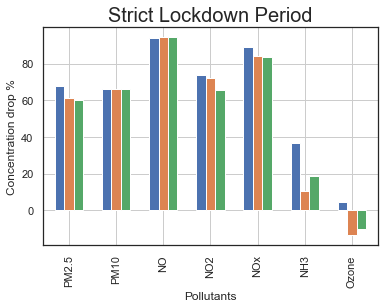

In [367]:
plot_df=pd.DataFrame([["PM2.5",-noLock_PM25,-lock_PM25,-pred_PM25],
                      ["PM10",-noLock_PM10,-lock_PM10,-pred_PM10],
                      ["NO",-noLock_NO,-lock_NO,-pred_NO],
                      ["NO2",-noLock_NO2,-lock_NO2,-pred_NO2],
                      ["NOx",-noLock_NOx,-lock_NOx,-pred_NOx],
                      ["NH3",-noLock_NH3,-lock_NH3,-pred_NH3],
                      ["Ozone",-noLock_ozone,-lock_ozone,-pred_ozone]],columns=["Pollutants","LongTerm 2013-2019","ShortTerm 2019","Predicted 2020"])
plot_df.plot(x="Pollutants",kind="bar",stacked=False,width=0.6,legend=None)
#plt.legend(loc="upper center", bbox_to_anchor=(1.3, 1.15), ncol=1)
plt.title("Strict Lockdown Period",fontsize=20)
plt.grid()
plt.ylabel("Concentration drop %")

#Lockdown with additional relaxations 15th Apr-17th May

In [494]:
tar_data=df.loc["2020-04-15":"2020-05-17"]

In [495]:
frames=[df.loc["2013-04-15":"2013-05-17"],df.loc["2014-04-15":"2014-05-17"],df.loc["2015-04-15":"2015-05-17"],df.loc["2016-04-15":"2016-05-17"],df.loc["2017-04-15":"2017-05-17"],df.loc["2018-04-15":"2018-05-17"],df.loc["2019-04-15":"2019-05-17"]]
noLock_data=pd.concat(frames)
noLock_data

,PM2.5,PM1,NO,NO2,NOx,NH3,SO2,CO,Ozone,RH,WS,WD,SR,BP,AT
From Date,,,,,,,,,,,,,,,
2013-04-21,137.885714,310.194286,108.195714,92.341429,233.938571,45.032857,27.382857,1.617143,66.645714,31.032857,1.387143,186.902857,211.171429,741.030000,29.442857
2013-04-28,100.527143,291.804286,9.864286,84.494286,90.155714,37.892857,24.925714,3.411429,95.181429,32.382857,1.432857,93.537143,100.637143,738.104286,29.528571
2013-05-05,125.228571,312.875714,14.231429,109.014286,116.291429,43.157143,30.928571,2.750000,66.014286,36.734286,1.067143,133.632857,74.880000,736.164286,28.832857
2013-05-12,147.262857,347.298571,9.547143,73.551429,79.584286,42.605714,26.188571,3.621429,81.282857,21.804286,1.330000,100.862857,106.444286,738.317143,33.424286
2014-04-20,110.665714,233.905714,9.895714,78.011429,84.202857,40.012857,49.274286,4.374286,53.058571,49.758571,1.155714,97.640000,99.172857,738.061429,26.947143
2014-04-27,109.658571,317.300000,9.908571,86.891429,92.444286,38.397143,29.827143,3.347143,87.928571,31.245714,1.388571,92.182857,99.911429,738.097143,29.760000
2014-05-04,105.588571,257.967143,13.982857,88.602857,97.848571,40.247143,26.062857,2.770000,80.050000,39.972857,1.284286,129.374286,88.461429,736.140000,28.524286
2014-05-11,157.048571,380.671429,9.777143,92.735714,96.765714,38.144286,32.007143,3.602857,75.484286,19.412857,1.181429,105.828571,93.222857,738.297143,33.460000
2015-04-19,103.585714,200.900000,9.982857,73.845714,80.600000,40.778571,43.201429,4.184286,49.612857,53.817143,1.152857,97.500000,99.641429,738.057143,25.667143


In [496]:
Lock_data=df.loc["2019-04-15":"2019-05-17"]

##PM2.5

In [497]:
tar_PM25=tar_data["PM2.5"].median()
tar_PM25

43.61071428571428

In [498]:
noLock_PM25=noLock_data["PM2.5"].median()
noLock_PM25

110.9692857142857

In [499]:
lock_PM25=Lock_data["PM2.5"].median()
lock_PM25

69.49285714285713

In [500]:
pred_PM25=78.04247

In [501]:
lock_PM25=((-lock_PM25+tar_PM25)/lock_PM25)*100
noLock_PM25=((-noLock_PM25+tar_PM25)/noLock_PM25)*100
pred_PM25=((-pred_PM25+tar_PM25)/pred_PM25)*100
pred_PM25

-44.11925418850238

In [502]:
tar_PM25

43.61071428571428

##PM10

In [503]:
pred_PM10=214.84022

In [504]:
tar_PM10=tar_data["PM1"].median()
tar_PM10

93.0657142857143

In [505]:
noLock_PM10=noLock_data["PM1"].median()
noLock_PM10

303.06357142857144

In [506]:
lock_PM10=Lock_data["PM1"].median()
lock_PM10

265.5121428571428

In [507]:
lock_PM10=(-1*(lock_PM10-tar_PM10)/lock_PM10)*100
noLock_PM10=(-1*(noLock_PM10-tar_PM10)/noLock_PM10)*100
pred_PM10=(-1*(pred_PM10-tar_PM10)/pred_PM10)*100
pred_PM10

-56.68142851198239

##NO

In [508]:
pred_NO=51.56729

In [509]:
tar_NO=tar_data["NO"].median()
tar_NO

2.17

In [510]:
noLock_NO=noLock_data["NO"].median()
noLock_NO

31.83071428571428

In [511]:
lock_NO=Lock_data["NO"].median()
lock_NO

49.91428571428572

In [512]:
lock_NO=(-1*(lock_NO-tar_NO)/lock_NO)*100
noLock_NO=(-1*(noLock_NO-tar_NO)/noLock_NO)*100
pred_NO=(-1*(pred_NO-tar_NO)/pred_NO)*100
pred_NO

-95.79190607068938

##NO2

In [513]:
pred_NO2=56.14787

In [514]:
tar_NO2=tar_data["NO2"].median()
tar_NO2

22.80428571428572

In [515]:
noLock_NO2=noLock_data["NO2"].median()
noLock_NO2

78.05285714285714

In [516]:
lock_NO2=Lock_data["NO2"].median()
lock_NO2

75.01285714285714

In [517]:
lock_NO2=(-1*(lock_NO2-tar_NO2)/lock_NO2)*100
noLock_NO2=(-1*(noLock_NO2-tar_NO2)/noLock_NO2)*100
pred_NO2=(-1*(pred_NO2-tar_NO2)/pred_NO2)*100
pred_NO2

-59.385305775115384

##NH3

In [518]:
pred_NH3=25.52775

In [519]:
tar_NH3=tar_data["NH3"].median()
tar_NH3

28.57428571428571

In [520]:
noLock_NH3=noLock_data["NH3"].median()
noLock_NH3

36.254285714285714

In [521]:
lock_NH3=Lock_data["NH3"].median()
lock_NH3

30.75928571428572

In [522]:
lock_NH3=(-1*(lock_NH3-tar_NH3)/lock_NH3)*100
noLock_NH3=(-1*(noLock_NH3-tar_NH3)/noLock_NH3)*100
pred_NH3=(-1*(pred_NH3-tar_NH3)/pred_NH3)*100
pred_NH3

11.934211649227644

##NOx

In [523]:
pred_NOx=72.66257

In [524]:
tar_NOx=tar_data["NOx"].median()
tar_NOx

14.71428571428571

In [525]:
noLock_NOx=noLock_data["NOx"].median()
noLock_NOx

94.60499999999999

In [526]:
lock_NOx=Lock_data["NOx"].median()
lock_NOx

82.92928571428571

In [527]:
lock_NOx=(-1*(lock_NOx-tar_NOx)/lock_NOx)*100
noLock_NOx=(-1*(noLock_NOx-tar_NOx)/noLock_NOx)*100
pred_NOx=(-1*(pred_NOx-tar_NOx)/pred_NOx)*100
pred_NOx

-79.74984133607481

##Ozone

In [528]:
pred_ozone=56.01282

In [529]:
tar_ozone=tar_data["Ozone"].median()
tar_ozone

59.77142857142857

In [530]:
noLock_ozone=noLock_data["Ozone"].median()
noLock_ozone

70.75571428571429

In [531]:
lock_ozone=Lock_data["Ozone"].median()
lock_ozone

57.892142857142844

In [532]:
lock_ozone

57.892142857142844

In [533]:
lock_ozone=(-1*(lock_ozone-tar_ozone)/lock_ozone)*100
noLock_ozone=(-1*(noLock_ozone-tar_ozone)/noLock_ozone)*100
pred_ozone=(-1*(pred_ozone-tar_ozone)/pred_ozone)*100
pred_ozone

6.710264849062366

##Final plot

Text(0, 0.5, 'Concentration drop %')

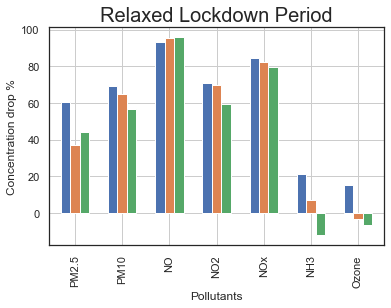

In [534]:
plot_df=pd.DataFrame([["PM2.5",-noLock_PM25,-lock_PM25,-pred_PM25],
                      ["PM10",-noLock_PM10,-lock_PM10,-pred_PM10],
                      ["NO",-noLock_NO,-lock_NO,-pred_NO],
                      ["NO2",-noLock_NO2,-lock_NO2,-pred_NO2],
                      ["NOx",-noLock_NOx,-lock_NOx,-pred_NOx],
                      ["NH3",-noLock_NH3,-lock_NH3,-pred_NH3],
                      ["Ozone",-noLock_ozone,-lock_ozone,-pred_ozone]],columns=["Pollutants","LongTerm 2013-2019","ShortTerm 2019","Predicted 2020"])
plot_df.plot(x="Pollutants",kind="bar",stacked=False,width=0.6,legend=None)
#plt.legend(loc="upper center", bbox_to_anchor=(1.3, 1.15), ncol=1)
plt.title("Relaxed Lockdown Period",fontsize=20)
plt.grid()
plt.ylabel("Concentration drop %")

#Liberal Lockdown 18th May-31st July

In [409]:
tar_data=df.loc["2020-05-18":"2020-07-31"]

In [410]:
frames=[df.loc["2013-05-18":"2013-07-31"],df.loc["2014-05-18":"2014-07-31"],df.loc["2015-05-18":"2015-07-31"],df.loc["2016-05-18":"2016-07-31"],df.loc["2017-05-18":"2017-07-31"],df.loc["2018-05-18":"2018-07-31"],df.loc["2019-05-18":"2019-07-31"]]
noLock_data=pd.concat(frames)
noLock_data

,PM2.5,PM1,NO,NO2,NOx,NH3,SO2,CO,Ozone,RH,WS,WD,SR,BP,AT
From Date,,,,,,,,,,,,,,,
2013-05-19,89.734286,197.158571,9.568571,97.027143,100.231429,63.301429,15.695714,2.934286,79.041429,41.602857,1.514286,92.367143,99.221429,738.515714,29.870000
2013-05-26,94.212857,318.114286,24.730000,75.370000,104.055714,38.730000,19.134286,2.610000,70.631429,20.692857,1.412857,124.677143,102.410000,738.404286,34.987143
2013-06-02,106.072857,326.125714,22.424286,75.558571,101.315714,31.104286,18.678571,2.554286,107.305714,24.151429,1.700000,110.038571,106.198571,738.381429,32.880000
2013-06-09,112.511429,236.282857,26.427143,96.138571,123.712857,47.572857,6.804286,4.371429,81.915714,35.934286,1.348571,113.262857,84.567143,738.484286,31.868571
2013-06-16,89.071429,222.228571,3.045714,58.274286,54.360000,37.730000,5.791429,0.774286,41.682857,44.624286,1.775714,126.765714,102.862857,738.481429,31.185714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-30,58.997143,207.891429,11.440000,48.744286,35.244286,23.631429,6.194286,1.432857,49.852857,41.590000,1.151429,187.517143,136.278571,989.808571,33.424286
2019-07-07,53.727143,126.332857,5.980000,40.830000,26.528571,24.550000,5.518571,1.481429,41.324286,54.607143,0.985714,174.482857,119.544286,989.911429,31.200000
2019-07-14,68.270000,280.812857,6.657143,37.295714,25.268571,21.988571,5.537143,1.517143,21.821429,51.912857,1.361429,195.832857,119.100000,989.688571,31.608571


In [411]:
Lock_data=df.loc["2019-07-18":"2019-07-31"]

##PM2.5

In [412]:
tar_PM25=tar_data["PM2.5"].median()
tar_PM25

27.283571428571427

In [413]:
noLock_PM25=noLock_data["PM2.5"].median()
noLock_PM25

69.92642857142857

In [414]:
lock_PM25=Lock_data["PM2.5"].median()
lock_PM25

45.03428571428572

In [415]:
pred_PM25=67.08906

In [416]:
lock_PM25=(-1*(lock_PM25-tar_PM25)/lock_PM25)*100
noLock_PM25=(-1*(noLock_PM25-tar_PM25)/noLock_PM25)*100
pred_PM25=(-1*(pred_PM25-tar_PM25)/pred_PM25)*100
pred_PM25

-59.33230927878341

In [417]:
tar_PM25

27.283571428571427

##PM10

In [418]:
pred_PM10=194.55566

In [419]:
tar_PM10=tar_data["PM1"].median()
tar_PM10

93.895

In [420]:
noLock_PM10=noLock_data["PM1"].median()
noLock_PM10

197.13714285714286

In [421]:
lock_PM10=Lock_data["PM1"].median()
lock_PM10

101.54142857142858

In [422]:
lock_PM10=(-1*(lock_PM10-tar_PM10)/lock_PM10)*100
noLock_PM10=(-1*(noLock_PM10-tar_PM10)/noLock_PM10)*100
pred_PM10=(-1*(pred_PM10-tar_PM10)/pred_PM10)*100
pred_PM10

-51.73874663939358

##NO

In [423]:
pred_NO=24.48468

In [424]:
tar_NO=tar_data["NO"].median()
tar_NO

4.6075

In [425]:
noLock_NO=noLock_data["NO"].median()
noLock_NO

12.901428571428571

In [426]:
lock_NO=Lock_data["NO"].median()
lock_NO

19.784285714285716

In [427]:
lock_NO=(-1*(lock_NO-tar_NO)/lock_NO)*100
noLock_NO=(-1*(noLock_NO-tar_NO)/noLock_NO)*100
pred_NO=(-1*(pred_NO-tar_NO)/pred_NO)*100
pred_NO

-81.18211060957302

##NO2

In [428]:
pred_NO2=49.82979

In [429]:
tar_NO2=tar_data["NO2"].median()
tar_NO2

28.455000000000005

In [430]:
noLock_NO2=noLock_data["NO2"].median()
noLock_NO2

55.33

In [431]:
lock_NO2=Lock_data["NO2"].median()
lock_NO2

43.69785714285715

In [432]:
lock_NO2=(-1*(lock_NO2-tar_NO2)/lock_NO2)*100
noLock_NO2=(-1*(noLock_NO2-tar_NO2)/noLock_NO2)*100
pred_NO2=(-1*(pred_NO2-tar_NO2)/pred_NO2)*100
pred_NO2

-42.89560521928749

##NH3

In [433]:
pred_NH3=25.02158

In [434]:
tar_NH3=tar_data["NH3"].median()
tar_NH3

23.008571428571425

In [435]:
noLock_NH3=noLock_data["NH3"].median()
noLock_NH3

34.77642857142857

In [436]:
lock_NH3=Lock_data["NH3"].median()
lock_NH3

25.485714285714288

In [437]:
lock_NH3=(-1*(lock_NH3-tar_NH3)/lock_NH3)*100
noLock_NH3=(-1*(noLock_NH3-tar_NH3)/noLock_NH3)*100
pred_NH3=(-1*(pred_NH3-tar_NH3)/pred_NH3)*100
pred_NH3

-8.045089764229816

##NOx

In [438]:
pred_NOx=55.15483

In [439]:
tar_NOx=tar_data["NOx"].median()
tar_NOx

18.94428571428571

In [440]:
noLock_NOx=noLock_data["NOx"].median()
noLock_NOx

75.71214285714285

In [441]:
lock_NOx=Lock_data["NOx"].median()
lock_NOx

39.37857142857143

In [442]:
lock_NOx=(-1*(lock_NOx-tar_NOx)/lock_NOx)*100
noLock_NOx=(-1*(noLock_NOx-tar_NOx)/noLock_NOx)*100
pred_NOx=(-1*(pred_NOx-tar_NOx)/pred_NOx)*100
pred_NOx

-65.65253539121468

##Ozone

In [443]:
pred_ozone=53.251749

In [444]:
tar_ozone=tar_data["Ozone"].median()
tar_ozone

15.001428571428571

In [445]:
noLock_ozone=noLock_data["Ozone"].median()
noLock_ozone

40.96142857142857

In [446]:
lock_ozone=Lock_data["Ozone"].median()
lock_ozone

28.652142857142856

In [447]:
lock_ozone

28.652142857142856

In [448]:
lock_ozone=(-1*(lock_ozone-tar_ozone)/lock_ozone)*100
noLock_ozone=(-1*(noLock_ozone-tar_ozone)/noLock_ozone)*100
pred_ozone=(-1*(pred_ozone-tar_ozone)/pred_ozone)*100
pred_ozone

-71.82922842322311

##Final Plot

Text(0, 0.5, 'Concentration drop %')

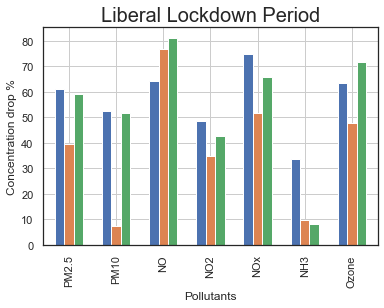

In [449]:
plot_df=pd.DataFrame([["PM2.5",-noLock_PM25,-lock_PM25,-pred_PM25],
                      ["PM10",-noLock_PM10,-lock_PM10,-pred_PM10],
                      ["NO",-noLock_NO,-lock_NO,-pred_NO],
                      ["NO2",-noLock_NO2,-lock_NO2,-pred_NO2],
                      ["NOx",-noLock_NOx,-lock_NOx,-pred_NOx],
                      ["NH3",-noLock_NH3,-lock_NH3,-pred_NH3],
                      ["Ozone",-noLock_ozone,-lock_ozone,-pred_ozone]],columns=["Pollutants","LongTerm 2013-2019","ShortTerm 2019","Predicted 2020"])
plot_df.plot(x="Pollutants",kind="bar",stacked=False,width=0.6,legend=None)
#plt.legend(loc="upper center", bbox_to_anchor=(1.3, 1.15), ncol=1)
plt.title("Liberal Lockdown Period",fontsize=20)
plt.grid()
plt.ylabel("Concentration drop %")

#After Lockdown 1st Aug-30th Nov

In [450]:
tar_data=df.loc["2020-08-01":"2020-11-30"]

In [451]:
frames=[df.loc["2013-08-01":"2013-11-30"],df.loc["2014-06-01":"2014-11-30"],df.loc["2015-08-01":"2015-11-30"],df.loc["2016-08-01":"2016-11-30"],df.loc["2017-08-01":"2017-11-30"],df.loc["2018-08-01":"2018-11-30"],df.loc["2019-08-01":"2019-11-30"]]
noLock_data=pd.concat(frames)
noLock_data

,PM2.5,PM1,NO,NO2,NOx,NH3,SO2,CO,Ozone,RH,WS,WD,SR,BP,AT
From Date,,,,,,,,,,,,,,,
2013-08-04,39.702857,83.597143,11.698571,44.420000,162.611429,24.668571,8.842857,0.942857,30.607143,71.377143,1.520000,150.315714,91.672857,738.187143,27.264286
2013-08-11,69.221429,115.045714,28.440000,66.868571,300.564286,33.401429,8.887143,1.090000,43.410000,80.257143,0.911429,128.864286,79.982857,739.771429,26.712857
2013-08-18,53.135714,108.040000,21.208571,63.035714,263.857143,34.821429,9.071429,1.237143,37.722857,74.175714,0.975714,146.104286,88.995714,738.348571,27.640000
2013-08-25,41.980000,119.860000,7.118571,35.141429,55.467143,25.805714,8.588571,1.155714,28.468571,60.830000,1.678571,130.364286,115.487143,737.442857,29.125714
2013-09-01,59.344286,151.585714,6.940000,37.285714,42.695714,24.078571,9.840000,1.192857,47.661429,56.171429,1.761429,93.021429,109.808571,738.000000,30.907143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-27,92.970000,272.804286,80.394286,47.874286,99.798571,17.520000,10.112857,1.941429,27.384286,58.634286,0.577143,213.245714,95.370000,972.085714,21.441429
2019-11-03,284.735714,477.715714,68.687143,45.787143,80.361429,23.642857,11.604286,1.725714,23.318571,65.238571,0.411429,206.304286,62.740000,972.088571,20.894286
2019-11-10,147.151429,253.190000,30.632857,24.797143,37.862857,13.642857,11.750000,1.235714,25.744286,59.065714,0.562857,192.847143,76.331429,972.034286,19.401429


In [452]:
Lock_data=df.loc["2019-08-01":"2019-11-30"]

##PM2.5

In [453]:
tar_PM25=tar_data["PM2.5"].median()
tar_PM25

67.10642857142858

In [454]:
noLock_PM25=noLock_data["PM2.5"].median()
noLock_PM25

76.28642857142857

In [455]:
lock_PM25=Lock_data["PM2.5"].median()
lock_PM25

51.19428571428571

In [456]:
pred_PM25=58.45567

In [457]:
lock_PM25=(-1*(lock_PM25-tar_PM25)/lock_PM25)*100
noLock_PM25=(-1*(noLock_PM25-tar_PM25)/noLock_PM25)*100
pred_PM25=(-1*(pred_PM25-tar_PM25)/pred_PM25)*100
pred_PM25

14.798835718465947

In [458]:
tar_PM25

67.10642857142858

##PM10

In [459]:
pred_PM10=141.26986

In [460]:
tar_PM10=tar_data["PM1"].median()
tar_PM10

132.905

In [461]:
noLock_PM10=noLock_data["PM1"].median()
noLock_PM10

192.07571428571424

In [462]:
lock_PM10=Lock_data["PM1"].median()
lock_PM10

112.9642857142857

In [463]:
lock_PM10=(-1*(lock_PM10-tar_PM10)/lock_PM10)*100
noLock_PM10=(-1*(noLock_PM10-tar_PM10)/noLock_PM10)*100
pred_PM10=(-1*(pred_PM10-tar_PM10)/pred_PM10)*100
pred_PM10

-5.92119224865091

##NO

In [464]:
pred_NO=39.72251

In [465]:
tar_NO=tar_data["NO"].median()
tar_NO

30.17928571428572

In [466]:
noLock_NO=noLock_data["NO"].median()
noLock_NO

25.255000000000003

In [467]:
lock_NO=Lock_data["NO"].median()
lock_NO

15.93285714285714

In [468]:
lock_NO=(-1*(lock_NO-tar_NO)/lock_NO)*100
noLock_NO=(-1*(noLock_NO-tar_NO)/noLock_NO)*100
pred_NO=(-1*(pred_NO-tar_NO)/pred_NO)*100
pred_NO

-24.02472624643881

##NO2

In [469]:
pred_NO2=39.87788

In [470]:
tar_NO2=tar_data["NO2"].median()
tar_NO2

49.22785714285714

In [471]:
noLock_NO2=noLock_data["NO2"].median()
noLock_NO2

56.99785714285715

In [472]:
lock_NO2=Lock_data["NO2"].median()
lock_NO2

39.22714285714286

In [473]:
lock_NO2=(-1*(lock_NO2-tar_NO2)/lock_NO2)*100
noLock_NO2=(-1*(noLock_NO2-tar_NO2)/noLock_NO2)*100
pred_NO2=(-1*(pred_NO2-tar_NO2)/pred_NO2)*100
pred_NO2

23.446525098267866

##NH3

In [474]:
pred_NH3=23.37722

In [475]:
tar_NH3=tar_data["NH3"].median()
tar_NH3

22.91142857142857

In [476]:
noLock_NH3=noLock_data["NH3"].median()
noLock_NH3

29.292142857142856

In [477]:
lock_NH3=Lock_data["NH3"].median()
lock_NH3

21.62857142857143

In [478]:
lock_NH3=(-1*(lock_NH3-tar_NH3)/lock_NH3)*100
noLock_NH3=(-1*(noLock_NH3-tar_NH3)/noLock_NH3)*100
pred_NH3=(-1*(pred_NH3-tar_NH3)/pred_NH3)*100
pred_NH3

-1.9925013691595148

##NOx

In [479]:
pred_NOx=56.69781

In [480]:
tar_NOx=tar_data["NOx"].median()
tar_NOx

52.48785714285714

In [481]:
noLock_NOx=noLock_data["NOx"].median()
noLock_NOx

102.4585714285714

In [482]:
lock_NOx=Lock_data["NOx"].median()
lock_NOx

30.76000000000001

In [483]:
lock_NOx=(-1*(lock_NOx-tar_NOx)/lock_NOx)*100
noLock_NOx=(-1*(noLock_NOx-tar_NOx)/noLock_NOx)*100
pred_NOx=(-1*(pred_NOx-tar_NOx)/pred_NOx)*100
pred_NOx

-7.425247742625086

##Ozone

In [484]:
pred_ozone=32.51084

In [485]:
tar_ozone=tar_data["Ozone"].median()
tar_ozone

41.114285714285714

In [486]:
noLock_ozone=noLock_data["Ozone"].median()
noLock_ozone

40.43142857142857

In [487]:
lock_ozone=Lock_data["Ozone"].median()
lock_ozone

31.64571428571429

In [488]:
lock_ozone

31.64571428571429

In [489]:
lock_ozone=(-1*(lock_ozone-tar_ozone)/lock_ozone)*100
noLock_ozone=(-1*(noLock_ozone-tar_ozone)/noLock_ozone)*100
pred_ozone=(-1*(pred_ozone-tar_ozone)/pred_ozone)*100
pred_ozone

26.463314126259768

Text(0, 0.5, 'Concentration drop %')

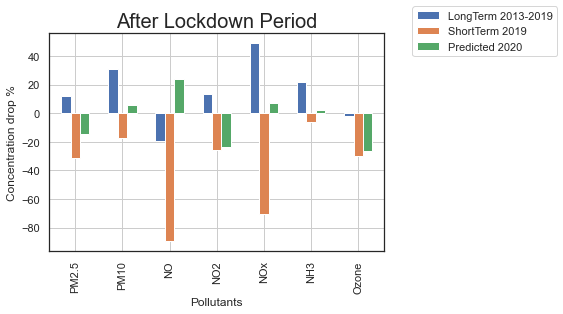

In [493]:
plot_df=pd.DataFrame([["PM2.5",-noLock_PM25,-lock_PM25,-pred_PM25],
                      ["PM10",-noLock_PM10,-lock_PM10,-pred_PM10],
                      ["NO",-noLock_NO,-lock_NO,-pred_NO],
                      ["NO2",-noLock_NO2,-lock_NO2,-pred_NO2],
                      ["NOx",-noLock_NOx,-lock_NOx,-pred_NOx],
                      ["NH3",-noLock_NH3,-lock_NH3,-pred_NH3],
                      ["Ozone",-noLock_ozone,-lock_ozone,-pred_ozone]],columns=["Pollutants","LongTerm 2013-2019","ShortTerm 2019","Predicted 2020"])
plot_df.plot(x="Pollutants",kind="bar",stacked=False,width=0.6)
plt.legend(loc="upper center", bbox_to_anchor=(1.3, 1.15), ncol=1)
plt.title("After Lockdown Period",fontsize=20)
plt.grid()
plt.ylabel("Concentration drop %")

In [491]:
BeforeLock=df.loc["2020-01-01":"2020-03-22"]

In [492]:
BeforeLock.head()

,PM2.5,PM1,NO,NO2,NOx,NH3,SO2,CO,Ozone,RH,WS,WD,SR,BP,AT
From Date,,,,,,,,,,,,,,,
2020-01-05,217.865714,378.930000,53.018571,31.524286,59.427143,25.832857,12.161429,1.527143,28.570000,72.517143,0.747143,174.481429,52.298571,972.534286,12.577143
2020-01-12,114.211429,217.078571,41.308571,51.030000,60.837143,20.282857,12.691429,1.097143,20.224286,70.624286,0.674286,179.728571,59.007143,971.900000,14.568571
2020-01-19,107.625714,194.907143,28.462857,38.085714,44.038571,17.610000,11.642857,0.840000,23.875714,75.188571,0.557143,202.705714,62.515714,972.167143,14.698571
2020-01-26,122.400000,244.208571,61.004286,43.218571,72.582857,15.732857,12.664286,1.538571,21.931429,66.365714,0.945714,210.932857,84.841429,972.015714,14.825714
2020-02-02,87.221429,196.780000,39.125714,39.318571,51.151429,14.677143,10.848571,0.798571,17.307143,67.324286,0.871429,195.438571,87.081429,972.014286,15.921429


In [263]:
BeforeLock=BeforeLock.reset_index()

In [264]:
BeforeLock['From Date']= pd.to_datetime(BeforeLock['From Date'])

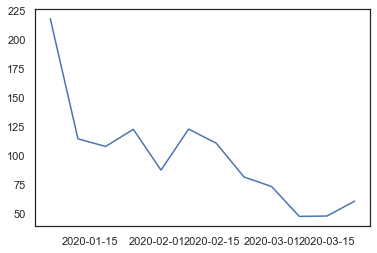

In [265]:
plt.plot(BeforeLock["From Date"],BeforeLock["PM2.5"])

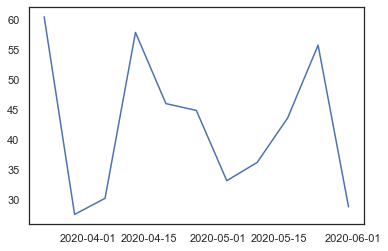

In [266]:
DuringLock=df.loc["2020-03-22":"2020-05-31"]
DuringLock=DuringLock.reset_index()
DuringLock['From Date']= pd.to_datetime(DuringLock['From Date'])
plt.plot(DuringLock["From Date"],DuringLock["PM2.5"])

In [267]:
BeforeLock['PM2.5'].mean()

99.3222619047619

In [268]:
DuringLock['PM2.5'].mean()

42.225779220779216

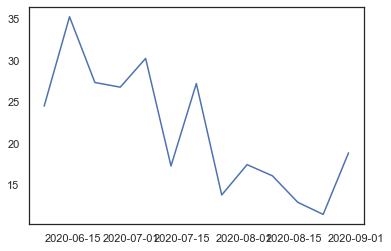

In [269]:
unlock=df.loc["2020-06-01":"2020-08-30"]
unlock=unlock.reset_index()
unlock['From Date']= pd.to_datetime(unlock['From Date'])
plt.plot(unlock["From Date"],unlock["PM2.5"])

In [270]:
unlock['PM2.5'].mean()

21.46956043956044

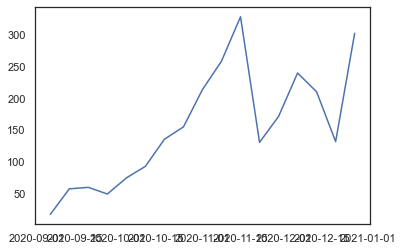

In [271]:
noLock=df.loc["2020-09-01":"2020-12-31"]
noLock=noLock.reset_index()
noLock['From Date']= pd.to_datetime(noLock['From Date'])
plt.plot(noLock["From Date"],noLock["PM2.5"])

In [272]:
noLock['PM2.5'].median()

135.5671428571428

In [273]:
noLock['PM2.5'].max()

328.8057142857143

In [274]:
noLock.loc[noLock['PM2.5']==noLock['PM2.5'].max()]

,From Date,PM2.5,PM1,NO,NO2,NOx,NH3,SO2,CO,Ozone,RH,WS,WD,SR,BP,AT
10,2020-11-15,328.805714,431.367143,135.784286,87.837143,159.938571,34.884286,17.25,2.181429,41.368571,64.42,0.455714,191.035714,71.885714,971.43,17.698571


In [275]:
av=df.loc["2020-10-01":"2020-12-31"]
av['PM2.5'].median()

171.5442857142857